In [1]:
import csv

with open("data_rs_CLEANED.csv") as f:
    rs_data = []
    for row in csv.DictReader(f):
        rs_data.append(dict(row))
        
print(len(rs_data))
display(rs_data[:1])

1170


[{'Team': '2018/19 Milwaukee Bucks',
  'Playoffs': 'True',
  'ORtg+': '103.1',
  'DRtg+': '104.9',
  'PRW': '60.0',
  'PRL': '22.0'}]

In [2]:
for row in rs_data:
    row["PRW"] = float(row["PRW"])
    row["ORtg+"] = float(row["ORtg+"])
    row["DRtg+"] = float(row["DRtg+"])
    skew = row["ORtg+"] - row["DRtg+"]
    if skew > 0:
        row["skew"] = "Offensive"
    elif skew < 0:
        row["skew"] = "Defensive"
    else:
        row["skew"] = "Neutral"

In [47]:
rs_team_row = []
rs_wins_row = []
rs_ortg_row = []
rs_drtg_row = []
playoffs_row = []
rs_skew_row = []
for row in rs_data:
    rs_team_row.append(row["Team"])
    rs_wins_row.append(row["PRW"])
    rs_ortg_row.append(row["ORtg+"])
    rs_drtg_row.append(row["DRtg+"])
    rs_skew_row.append(row["skew"])
    if row["Playoffs"] == "True":
        playoffs_row.append("Playoffs")
    else:
        playoffs_row.append("Non-Playoffs")
    
    
# print(rs_playoffs_row)

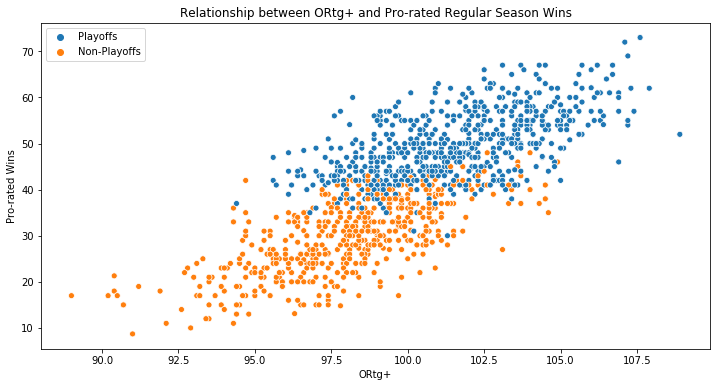

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
        
# print(playoffs_row)

# plt.scatter(rs_ortg_row, rs_wins_row, c = playoffs_row)
# scatter = plt.scatter(rs_ortg_row, rs_wins_row, c = playoffs_row)

# # produce a legend with the unique colors from the scatter
# legend_elements = [Line2D([0], [0], marker='o', color='white', label='Playoffs',
#                           markerfacecolor='yellow', markersize=10),
#                    Line2D([0], [0], marker='o', color='white', label='Non-Playoffs',
#                           markerfacecolor='purple', markersize=10)]

# plt.legend(handles=legend_elements, loc='upper left')

plt.figure(figsize=(12,6))
plt.xlabel("ORtg+")
plt.ylabel("Pro-rated Wins")
plt.title("Relationship between ORtg+ and Pro-rated Regular Season Wins")
sns.scatterplot(rs_ortg_row, rs_wins_row, hue = playoffs_row)
plt.show()

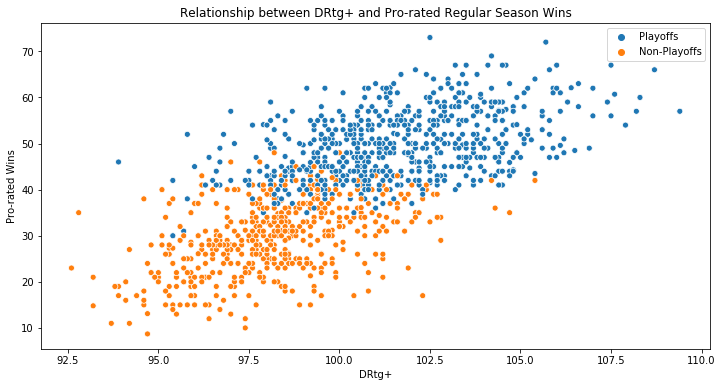

In [50]:
# plt.scatter(rs_drtg_row, rs_wins_row, c = playoffs_row)
# legend_elements = [Line2D([0], [0], marker='o', color='white', label='Playoffs',
#                           markerfacecolor='yellow', markersize=10),
#                    Line2D([0], [0], marker='o', color='white', label='Non-Playoffs',
#                           markerfacecolor='purple', markersize=10)]
# plt.legend(handles=legend_elements, loc='upper left')

plt.figure(figsize=(12,6))
plt.xlabel("DRtg+")
plt.ylabel("Pro-rated Wins")
plt.title("Relationship between DRtg+ and Pro-rated Regular Season Wins")
sns.scatterplot(rs_drtg_row, rs_wins_row, hue = playoffs_row)
plt.show()

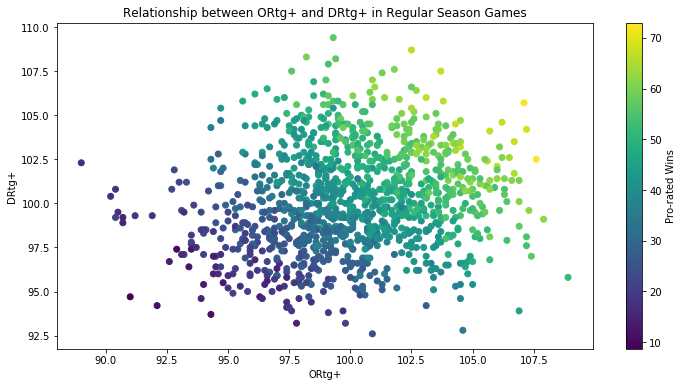

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(rs_ortg_row, rs_drtg_row, c = rs_wins_row)
plt.colorbar(label = "Pro-rated Wins")
plt.xlabel("ORtg+")
plt.ylabel("DRtg+")
plt.title("Relationship between ORtg+ and DRtg+ in Regular Season Games")
plt.show()

In [26]:
rs_above_70 = []
rs_60_to_70 = []
rs_50_to_60 = []
rs_40_to_50 = []
rs_below_40 = []

for row in rs_data:
    wins = row["PRW"]
    if wins >= 70:
        rs_above_70.append(row["skew"])
    elif wins >= 60:
        rs_60_to_70.append(row["skew"])
    elif wins >= 50:
        rs_50_to_60.append(row["skew"])
    elif wins >= 40:
        rs_40_to_50.append(row["skew"])
    else:
        rs_below_40.append(row["skew"])
    
    
# print(rs_above_70)
# print(rs_60_to_70)
# print(rs_50_to_60)
# print(rs_40_to_50)
# print(rs_below_40)
total = len(rs_above_70) + len(rs_60_to_70) + len(rs_50_to_60) + len(rs_40_to_50) + len(rs_below_40)
print(total)

1170


In [27]:
def getSkewStats(list_of_skews):
    stats = {"Offensive": 0,
            "Defensive": 0,
            "Neutral": 0}
    for data in list_of_skews:
        if data == "Offensive":
            stats["Offensive"] += 1
        elif data == "Defensive":
            stats["Defensive"] += 1
        else:
            stats["Neutral"] += 1
    return stats

In [7]:
getSkewStats(rs_40_to_50)

{'Offensive': 181, 'Defensive': 180, 'Neutral': 4}

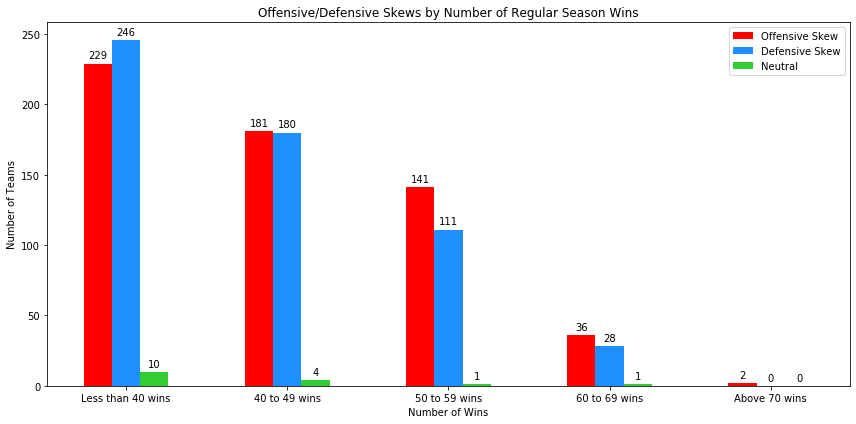

In [41]:
import numpy as np

offensive_numbers = []
defensive_numbers = []
neutral_numbers = []

skew_stats_below_40 = getSkewStats(rs_below_40)
offensive_numbers.append(skew_stats_below_40["Offensive"])
defensive_numbers.append(skew_stats_below_40["Defensive"])
neutral_numbers.append(skew_stats_below_40["Neutral"])

skew_stats_40to50 = getSkewStats(rs_40_to_50)
offensive_numbers.append(skew_stats_40to50["Offensive"])
defensive_numbers.append(skew_stats_40to50["Defensive"])
neutral_numbers.append(skew_stats_40to50["Neutral"])

skew_stats_50to60 = getSkewStats(rs_50_to_60)
offensive_numbers.append(skew_stats_50to60["Offensive"])
defensive_numbers.append(skew_stats_50to60["Defensive"])
neutral_numbers.append(skew_stats_50to60["Neutral"])

skew_stats_60to70 = getSkewStats(rs_60_to_70)
offensive_numbers.append(skew_stats_60to70["Offensive"])
defensive_numbers.append(skew_stats_60to70["Defensive"])
neutral_numbers.append(skew_stats_60to70["Neutral"])

skew_stats_above_70 = getSkewStats(rs_above_70)
offensive_numbers.append(skew_stats_above_70["Offensive"])
defensive_numbers.append(skew_stats_above_70["Defensive"])
neutral_numbers.append(skew_stats_above_70["Neutral"])

labels = ['Less than 40 wins', '40 to 49 wins', '50 to 59 wins', '60 to 69 wins', 'Above 70 wins']

x = np.arange(len(labels))  # the label locations
width = 0.175  # the width of the bars


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
rects1 = ax.bar(x - width, offensive_numbers, width, label='Offensive Skew', color="red")
rects2 = ax.bar(x,  defensive_numbers, width, label='Defensive Skew', color="dodgerblue")
rects3 = ax.bar(x + width, neutral_numbers, width, label='Neutral', color="limegreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Teams')
ax.set_xlabel("Number of Wins")
ax.set_title('Offensive/Defensive Skews by Number of Regular Season Wins')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation = 0)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [29]:
playoffs_skew = []
non_playoffs_skew = []

for row in rs_data:
    if row["Playoffs"] == "True":
        playoffs_skew.append(row["skew"])
    else:
        non_playoffs_skew.append(row["skew"])
        
print(len(playoffs_skew))
print(len(non_playoffs_skew))
# display(non_playoffs_skew)

660
510


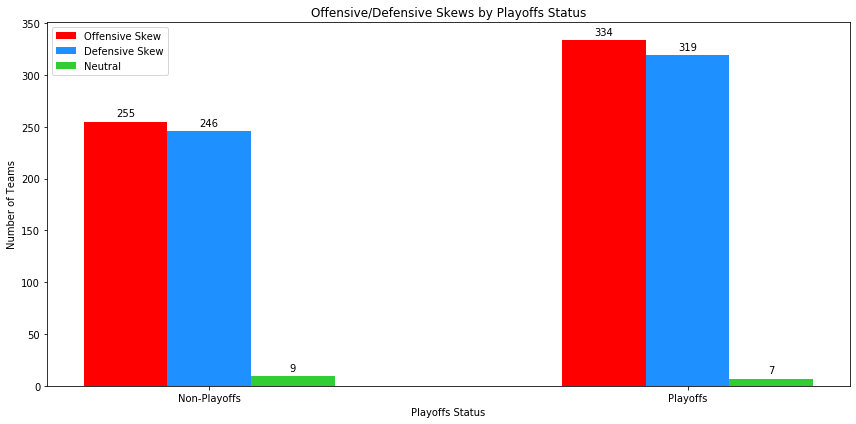

In [30]:
offensive_numbers = []
defensive_numbers = []
neutral_numbers = []

non_playoffs_skew = getSkewStats(non_playoffs_skew)
offensive_numbers.append(non_playoffs_skew["Offensive"])
defensive_numbers.append(non_playoffs_skew["Defensive"])
neutral_numbers.append(non_playoffs_skew["Neutral"])

playoffs_skew = getSkewStats(playoffs_skew)
offensive_numbers.append(playoffs_skew["Offensive"])
defensive_numbers.append(playoffs_skew["Defensive"])
neutral_numbers.append(playoffs_skew["Neutral"])

labels = ["Non-Playoffs", "Playoffs"]

x = np.arange(len(labels))  # the label locations
width = 0.175  # the width of the bars


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
rects1 = ax.bar(x - width, offensive_numbers, width, label='Offensive Skew', color="red")
rects2 = ax.bar(x,  defensive_numbers, width, label='Defensive Skew', color="dodgerblue")
rects3 = ax.bar(x + width, neutral_numbers, width, label='Neutral', color="limegreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Teams')
ax.set_xlabel("Playoffs Status")
ax.set_title('Offensive/Defensive Skews by Playoffs Status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation = 0)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [32]:
def getAverageWins(skew, data):
    count = 0
    wins = 0
    for row in data:
        if row["skew"] == skew:
            count += 1
            wins += row["PRW"]
    return round(wins / count, 2)
        

In [33]:
average_wins = []
average_wins.append(getAverageWins("Offensive", rs_data))
average_wins.append(getAverageWins("Defensive", rs_data))
average_wins.append(getAverageWins("Neutral", rs_data))

print(average_wins)

[42.03, 40.05, 36.5]


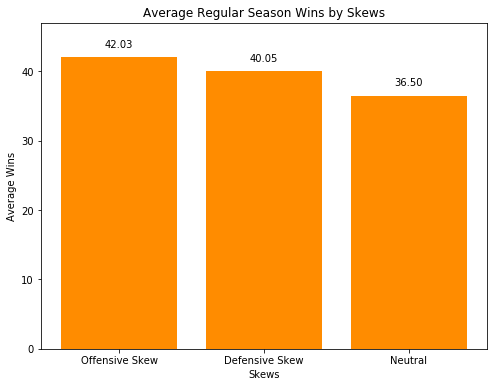

In [43]:
plt.figure(figsize=(8,6))
x_row = ["Offensive Skew", "Defensive Skew", "Neutral"]
plt.bar(x_row, average_wins, color="darkorange")
y_max = max(average_wins) + 5
plt.ylim(0, y_max)
plt.xlabel("Skews")
plt.ylabel("Average Wins")
plt.title("Average Regular Season Wins by Skews")
for x,y in zip(x_row,average_wins):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [45]:
with open("data_playoffs_CLEANED.csv") as f:
    playoffs_data = []
    for row in csv.DictReader(f):
        playoffs_data.append(dict(row))
        
display(playoffs_data[:2])
print(len(playoffs_data))

[{'Team': '2019 Toronto Raptors',
  'ORtg+': '103.0',
  'DRtg+': '105.9',
  'Champions': 'True'},
 {'Team': '2019 Golden State Warriors',
  'ORtg+': '108.0',
  'DRtg+': '98.8',
  'Champions': 'False'}]

660


In [46]:
for row in playoffs_data:
    row["ORtg+"] = float(row["ORtg+"])
    row["DRtg+"] = float(row["DRtg+"])
    skew = row["ORtg+"] - row["DRtg+"]
    if skew > 0:
        row["skew"] = "Offensive"
    elif skew < 0:
        row["skew"] = "Defensive"
    else:
        row["skew"] = "Neutral"
    

In [51]:
playoffs_team_row = []
playoffs_ortg_row = []
playoffs_drtg_row = []
champions_row = []
for row in playoffs_data:
    playoffs_team_row.append(row["Team"])
    playoffs_ortg_row.append(row["ORtg+"])
    playoffs_drtg_row.append(row["DRtg+"])
    if row["Champions"] == "True":
        champions_row.append("Champions")
    else:
        champions_row.append("Non-Champions")
        
# print(champions_row)

In [52]:
playoffs_skews = [0, 0, 0]

for row in playoffs_data:
    if row["skew"] == "Offensive":
        playoffs_skews[0] += 1
    elif row["skew"] == "Defensive":
        playoffs_skews[1] += 1
    else:
        playoffs_skews[2] += 1

print(playoffs_skews)

[315, 341, 4]


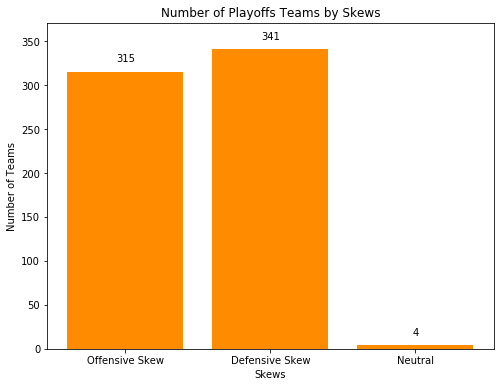

In [57]:
plt.figure(figsize=(8,6))
x_row = ["Offensive Skew", "Defensive Skew", "Neutral"]
plt.bar(x_row, playoffs_skews, color="darkorange")
y_max = max(playoffs_skews) + 30
plt.ylim(0, y_max)
plt.xlabel("Skews")
plt.ylabel("Number of Teams")
plt.title("Number of Playoffs Teams by Skews")
for x,y in zip(x_row,playoffs_skews):

    label = y

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

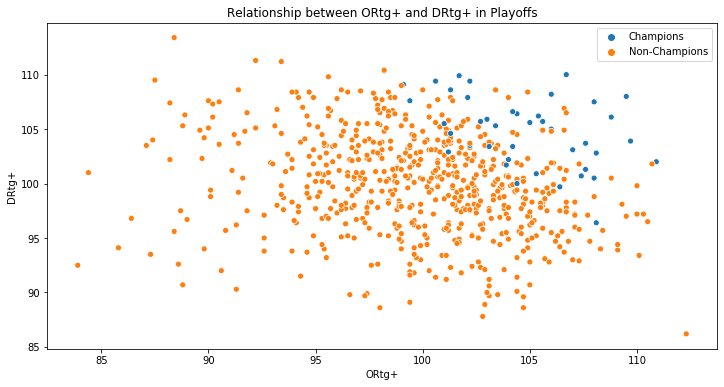

In [58]:
plt.figure(figsize=(12,6))
sns.scatterplot(playoffs_ortg_row, playoffs_drtg_row, hue = champions_row)
plt.xlabel("ORtg+")
plt.ylabel("DRtg+")
plt.title("Relationship between ORtg+ and DRtg+ in Playoffs")
plt.show()

In [59]:
with open("data_champions_CLEANED.csv") as f:
    champions_data = []
    for row in csv.DictReader(f):
        champions_data.append(dict(row))
        
display(champions_data[:2])
print(len(champions_data))

[{'Team': '2019 Toronto Raptors',
  'ORtg+': '103.0',
  'DRtg+': '105.9',
  'Champions': 'True'},
 {'Team': '2018 Golden State Warriors',
  'ORtg+': '105.4',
  'DRtg+': '106.2',
  'Champions': 'True'}]

43


In [60]:
for row in champions_data:
    row["ORtg+"] = float(row["ORtg+"])
    row["DRtg+"] = float(row["DRtg+"])
    skew = row["ORtg+"] - row["DRtg+"]
    if skew > 0:
        row["skew"] = "Offensive"
    elif skew < 0:
        row["skew"] = "Defensive"
    else:
        row["skew"] = "Neutral"
    

In [61]:
champions_skews = [0, 0, 0]

for row in champions_data:
    if row["skew"] == "Offensive":
        champions_skews[0] += 1
    elif row["skew"] == "Defensive":
        champions_skews[1] += 1
    else:
        champions_skews[2] += 1

print(champions_skews)

[19, 23, 1]


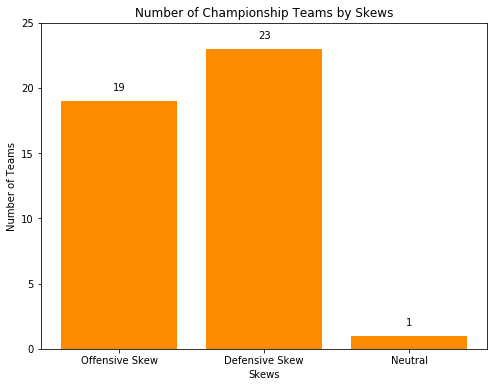

In [67]:
plt.figure(figsize=(8,6))
x_row = ["Offensive Skew", "Defensive Skew", "Neutral"]
plt.bar(x_row, champions_skews, color="darkorange")
y_max = max(champions_skews) + 2
plt.ylim(0, y_max)
plt.xlabel("Skews")
plt.ylabel("Number of Teams")
plt.title("Number of Championship Teams by Skews")
for x,y in zip(x_row,champions_skews):

    label = y

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [68]:
champions_team_row = []
champions_ortg_row = []
champions_drtg_row = []
for row in champions_data:
    champions_team_row.append(row["Team"])
    champions_ortg_row.append(row["ORtg+"])
    champions_drtg_row.append(row["DRtg+"])

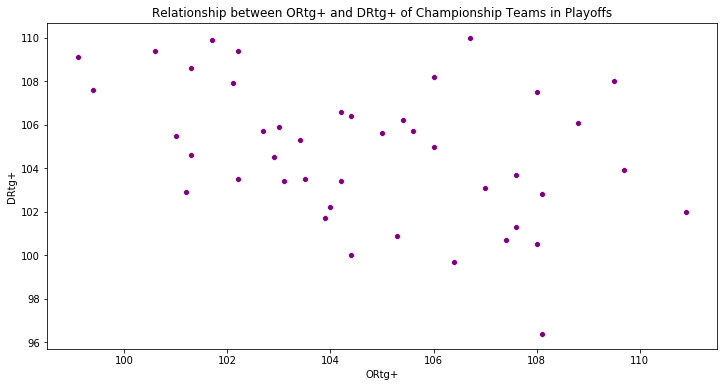

In [73]:
plt.figure(figsize=(12, 6))
sns.scatterplot(champions_ortg_row, champions_drtg_row, color="purple")
plt.xlabel("ORtg+")
plt.ylabel("DRtg+")
plt.title("Relationship between ORtg+ and DRtg+ of Championship Teams in Playoffs")
plt.show()